**Лабораторный практикум 5. Плоскость и прямая в пространстве**

Загрузка необходимых библиотек:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *
from matplotlib import cm

**Упражнение 5.1. Найти уравнение плоскости, проходящей через точки (1,1,2), (2,4,7) и (3,5,1) (в функции Plane необходимо задать три точки). Сделать проверку.**

In [6]:
b = Plane(Point(1, 1, 2), Point(2, 4, 7), Point(3, 5, 1))
print("Уравнение искомой плоскости:", b.equation())

Уравнение искомой плоскости: -23*x + 11*y - 2*z + 16


Проверка:

In [6]:
print(-23*1+11*1-2*2+16==0)

True


**Упражнение 5.2. Найти уравнение плоскости, проходящей через точки (4,2,3), (2,0,1) и перпендикулярной плоскости x+2y+3z+4=0. Проверить ортогональность нормальных векторов полученных плоскостей.**

In [29]:
c = Plane(Point(4, 2, 3), normal_vector=(1, 2, 3))
qq=c.perpendicular_plane(Point3D(2, 0, 1))
print("Уравнение плоскости:", qq.equation())

n1 = np.array([1, 2, 3])
n2 = np.array ([-2, 1, 0])

print("Скалярное произведение равно нулю:", np.dot(n1, n2)==0)

Уравнение плоскости: -2*x + y + 4
Скалярное произведение равно нулю: True


*Вектора ортогональны, так как их скалярное произведение равно нулю.*

**Упражнение 5.3. Найти расстояние от точки (1,2,3) до плоскости x+y+z-3=0**

In [41]:
a = Plane(Point3D(1, 1, 1), Point3D(2, -2, 3), Point3D(-2, 2, 3))
print("Расстояние до точки:", a.distance(Point3D(1, 2, 3)))

Расстояние до точки: sqrt(3)


**Упражнение 5.4. Построить плоскость, проходящую через точку М(1,-1,-3) и имеющую нормальный вектор n(2,-3,5). Найти расстояние от начала координат до данной плоскости. Вывести в заголовок графика общее уравнение плоскости. Изобразить нормальный вектор и данную точку.**

In [60]:
b = Plane(Point(1, -1, -3), normal_vector=(2, -3, 5))
print("Уравнение плоскости:", b.equation())
print("Расстояние до начала координат:", b.distance(Point3D(0, 0, 0)))

Уравнение плоскости: 2*x - 3*y + 5*z + 10
Расстояние до начала координат: 5*sqrt(38)/19


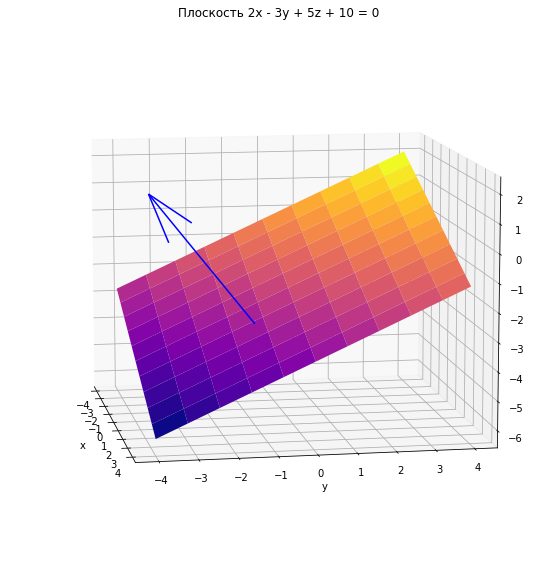

In [118]:
# параметры плоскости
A = 2; B = -3; C = 5; D = 10
f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст
ax = fig.add_subplot(1, 1, 1, projection="3d")

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y
x, y = np.meshgrid(xval, yval)

p = np.array([1, -1, -3]) # точка на плоскости
ax.scatter(1, -1, -3) # построение точки на плоскости

v = np.array([A, B, C]) # вектор нормали
ax.quiver(*p, *v, color="Blue") # построение вектора нормали на плоскости

z = f(x, y) # вычисляем значения z в точках
surf = ax.plot_surface(x, y, z, rstride=10, cstride=10, cmap=cm.plasma) # строим плоскость

plt.xlabel("x")
plt.ylabel("y")
plt.title("Плоскость 2x - 3y + 5z + 10 = 0")

ax.view_init(10, -10)
plt.show()

**Упражнение 5.5. Построить плоскость, проходящую через точку М(2,3,-4) и параллельно векторам a(-3,2,-1) и b(0,3,1). Найти расстояние от точки N(-3,1,3)  до данной плоскости. Вывести в заголовок графика общее уравнение плоскости. Изобразить нормальный вектор и данные точки. Указать координаты нормального вектора.**

Возьмем произвольную точку М1(x, y, z), принадлежащую искомой плоскости. Тогда векторы M1M, a, b являются компланарными и их смешанное произведение равно нулю.

In [9]:
x, y, z = symbols('x y z')
v1 = Matrix([[x-2, y-3, z+4],[-3, 2, -1], [0, 3, 1]])
print("Уравнение плоскости:", det(v1))

Уравнение плоскости: 5*x + 3*y - 9*z - 55


Расстояние до точки N: 94*sqrt(115)/115 



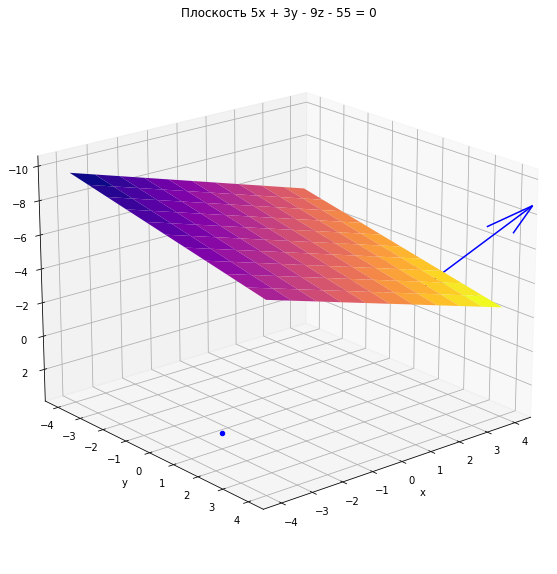

Координаты нормального вектора: {5; 3; -9}


In [33]:
# параметры плоскости
A = 5; B = 3; C = -9; D = -55
f = lambda x, y: (-A * x - B * y - D) / C # строим плоскость

fig = plt.figure(figsize=(10, 10)) # создаём холст
ax = fig.add_subplot(1, 1, 1, projection="3d")

xval = np.linspace(-4, 4, 100) # разбиение для x
yval = np.linspace(-4, 4, 100) # разбиение для y
x, y = np.meshgrid(xval, yval)

p = np.array([2, 3, -4]) # точка на плоскости
v = np.array([A, B, C]) # вектор нормали
ax.quiver(*p, *v/2, color="Blue") # строим вектор нормали

z = f(x, y) # вычисляем значения z в точках
surf = ax.plot_surface(x, y, z, rstride=10, cstride=10, cmap=cm.plasma) # строим плоскость

plt.xlabel("x")
plt.ylabel("y")
plt.title("Плоскость 5x + 3y - 9z - 55 = 0")


# построение точки на плоскости
ax.scatter(2, 3, -4, color = "Green")
ax.scatter(-3, 1, 3, color = "Blue")

my_plane = Plane(Point3D(11, 0, 0), normal_vector=(A, B, C))
print("Расстояние до точки N:", my_plane.distance(Point3D(-3, 1, 3)), "\n")

ax.view_init(-160, -50)
plt.show()

print("Координаты нормального вектора: {5; 3; -9}")

**Упражнение 5.6. Найти уравнение прямой, проходящей через точку (9,8,7) перпендикулярно плоскости 2(x-1)+4(y-4)+6(z-6)=0. Найти векторное произведение нормалей полученных плоскостей.**

In [27]:
b = Plane(Point(0, 0, 9), normal_vector=(2, 4, 6))
qq_plane = b.perpendicular_plane(Point3D(9, 8, 7))
qq=b.perpendicular_line(Point3D(9, 8, 7))

print("Уравнение данной плоскости:", b.equation())
print("Уравнение перпендикулярной плоскости:", qq_plane.equation())
print("Уравнение перпендикулярной прямой:", qq.equation())

Уравнение данной плоскости: 2*x + 4*y + 6*z - 54
Уравнение перпендикулярной плоскости: -4*x + 2*y + 20
Уравнение перпендикулярной прямой: (-2*x + y + 10, -3*x + z + 20)


In [47]:
a = np.array([2, 4, 6])
b = np.array([-4, 2, 0])
print("Векторное произведение нормалей полученных плоскостей:", np.cross(a, b))

Векторное произведение нормалей полученных плоскостей: [-12 -24  20]


**Упражнение 5.7. Найти параметрические уравнения прямой, проходящей через точку М(2, -1, -3) параллельной данной прямой (параметрическое уравнение).** 

In [11]:
p1, p2,p3 = Point(-1,2,0), Point(1,-2,1), Point(2,-1,-3)
A=np.array([-1,2,0])
B=np.array([1,-2,1])
Q=A-B
print(*Q)

-2 4 -1


In [12]:
print("Параметрическое уравнение искомой прямой:")
print("x = 2+2t")
print("y = -1-4t")
print("z = -3+t")

Параметрическое уравнение искомой прямой:
x = 2+2t
y = -1-4t
z = -3+t


**Упражнение 5.8. Найти величину острого угла между прямыми.**

In [21]:
n1 = np.array([1, -1, 2])
n2 = np.array([2, 1, -1])
q = np.cross(n1, n2)
print(q)

[-1  5  3]


In [22]:
print(math.degrees(math.acos((-1*-3+5*1+3*-2)/(math.sqrt(1+25+9)*math.sqrt(9+1+4)))))

84.81621188639929


**Упражнение 5.9. Найти расстояние между параллельными прямыми.**

In [16]:
a=np.array([2,-1,0])
b=np.array([7,1,3])

l1= Line3D(Point3D(2, -1, 0), Point3D(5, 3, 2))

print("Расстояние между параллельными прямыми:", l1.distance(Point3D(10, 5, 5)))

Расстояние между параллельными прямыми: 3
